In [30]:
import numpy as np
from skimage.metrics import structural_similarity
from PIL import Image
import cv2 as cv2
import imutils as it

In [3]:
orig = cv2.imread('pan-card-original.jpg')
tamp = cv2.imread('pan-card-tampered.png')

In [32]:
print("Orginal Image")
Image.fromarray(orig)


Orginal Image


In [33]:
print("Tampered image")
Image.fromarray(tamp)


Tampered image


In [4]:
print("Original image shape: ",orig.shape) 
print("Tampered image shape ",tamp.shape) 

Original image shape:  (800, 1200, 3)
Tampered image shape  (179, 282, 3)


In [7]:
cv2.imshow('original',orig)
cv2.imshow('tampered',tamp)

In [10]:
orig= cv2.resize(orig,(250, 160))
print(orig.shape)

tamp= cv2.resize(tamp,(250,160))
print(tamp.shape)


(160, 250, 3)
(160, 250, 3)


In [11]:
orig_gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
tamp_gray = cv2.cvtColor(tamp, cv2.COLOR_BGR2GRAY)

In [16]:
(score, d) = structural_similarity(orig_gray, tamp_gray, full=True)
d = (d* 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.2394444230919479


THE SSIM SCORE IS WHAT HELPS US IN DETERMINING THE SIMILARITY. LOWER SSIM MEANS LOWER SIMILARITY. 

In [22]:
threshhold = cv2.threshold(d, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours= cv2.findContours(threshhold.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours= it.grab_contours(contours)

In [25]:

for i in contours:
    (x, y, w, h) = cv2.boundingRect(i)
    cv2.rectangle(orig, (x, y), (x+w,y+h), (0, 0, 255), 2)
    cv2.rectangle(tamp, (x, y), (x+w,y+h), (0, 0, 255), 2)

OriginalImage with contour dots


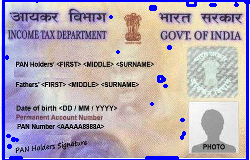

In [27]:
print('OriginalImage with contour dots')
Image.fromarray(orig)

Tampered Image


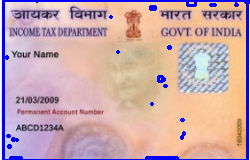

In [28]:
print('Tampered Image')
Image.fromarray(tamp)

Different Image


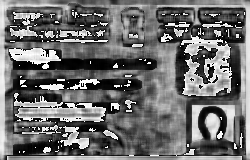

In [34]:
print('Different Image')
Image.fromarray(d)

Threshold Image


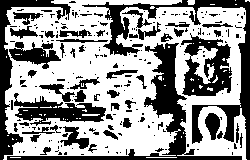

In [35]:
print('Threshold Image')
Image.fromarray(threshhold)